In [29]:
import numpy as np
import matplotlib.pyplot as plt

## Create data

In [30]:
X = 1 * np.random.rand(200,1)
Y = 5 +10 * X+np.random.randn(200,1)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12'),
  Text(0, 14.0, '14'),
  Text(0, 16.0, '16'),
  Text(0, 18.0, '18')])

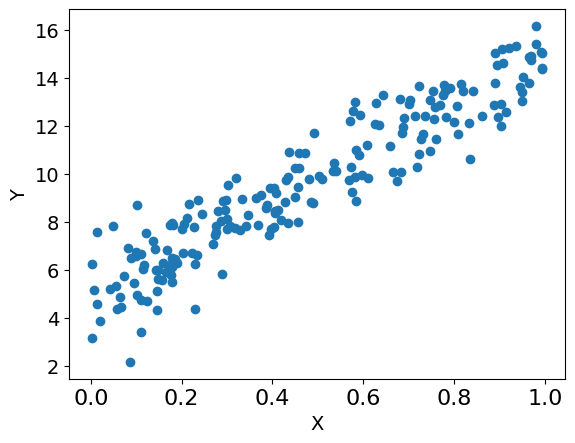

In [31]:
plt.scatter(X,Y)
plt.xlabel("X", fontsize=14)
plt.xticks(fontsize=16)
plt.ylabel("Y",fontsize=14)
plt.yticks(fontsize=14)
#_ =plt.axis([0,2,0,15])

## Defining Cost Function

In [32]:

def  cal_cost(theta,X,Y):
    '''
    
    Calculates the cost for given X and y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    Y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(Y)
    
    predictions = X.dot(theta)
    cost = (1/m) * np.sum(np.square(predictions-Y))
    return cost


## Defining Mini Gradient Descent Function

In [33]:
def minibatch_gradient_descent(X,Y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    #X    = Matrix of X without added bias units
    #Y    = Vector of Y
    #theta=Vector of thetas np.random.randn(j,1)

    m = len(Y)
    batches = int(m/batch_size)
    cost_history = np.zeros((batches, iterations))

    for it in range(iterations):
        cost = 0.0      #Initialize
        c_new=0.0
        indices = np.random.permutation(m)
        X = X[indices]
        Y = Y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i:i+batch_size]
            Y_i = Y[i:i+batch_size]
            X_i = np.c_[np.ones(len(X_i)), X_i]

            prediction = np.dot(X_i, theta)
            theta = theta - (1/m) * learning_rate * (X_i.T.dot((prediction - Y_i)))
            cost += cal_cost(theta,X_i,Y_i)
            cost_history[int(i/batch_size)][it]  = cal_cost(theta,X_i,Y_i)

    return theta, cost_history

### Splitting the data into train:validation:test split of 70:20:10

In [34]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# Split the train set into train and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.222222, random_state=42)

print("Training Set:", f'X:{X_train.shape}, Y:{Y_train.shape}')
print("Validation Set:", f'X:{X_val.shape}, Y:{Y_val.shape}')
print("Test Set:", f'X:{X_test.shape}, Y:{Y_test.shape}')


Training Set: X:(140, 1), Y:(140, 1)
Validation Set: X:(40, 1), Y:(40, 1)
Test Set: X:(20, 1), Y:(20, 1)


In [35]:
lr =0.1
n_itr = 1000
batch_size=20
theta = np.random.randn(2,1)


theta,cost_history = minibatch_gradient_descent(X_train,Y_train,theta,lr,n_itr,batch_size)
temp = np.c_[np.ones(len(X_train)),X_train]
Y_train_pred1 = np.dot(temp, theta)

print('Theta0:    {:0.3f},\nTheta1:    {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1][-1]))

Theta0:    4.835,
Theta1:    9.991
Final cost/MSE:  1.042


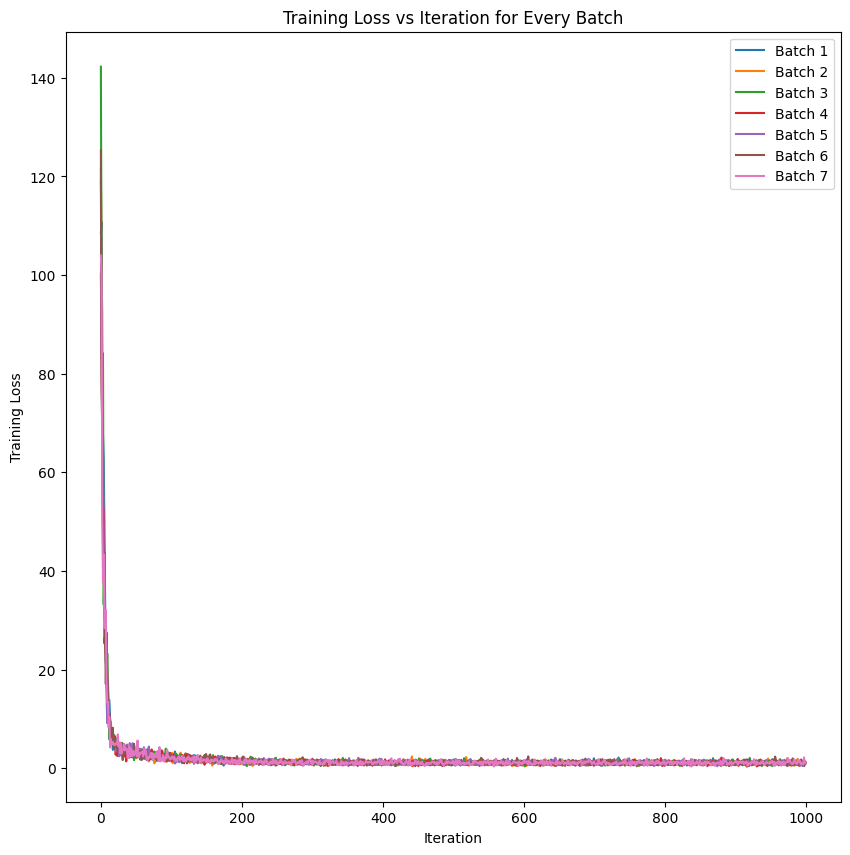

In [36]:
plt.figure(figsize=(10, 10))
for batch_number, costs in enumerate(cost_history):
    iteration_nums = np.arange(len(costs))  
    plt.plot(iteration_nums, costs, label=f'Batch {batch_number+1}')

plt.xlabel('Iteration')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Iteration for Every Batch')
plt.legend()
plt.show()

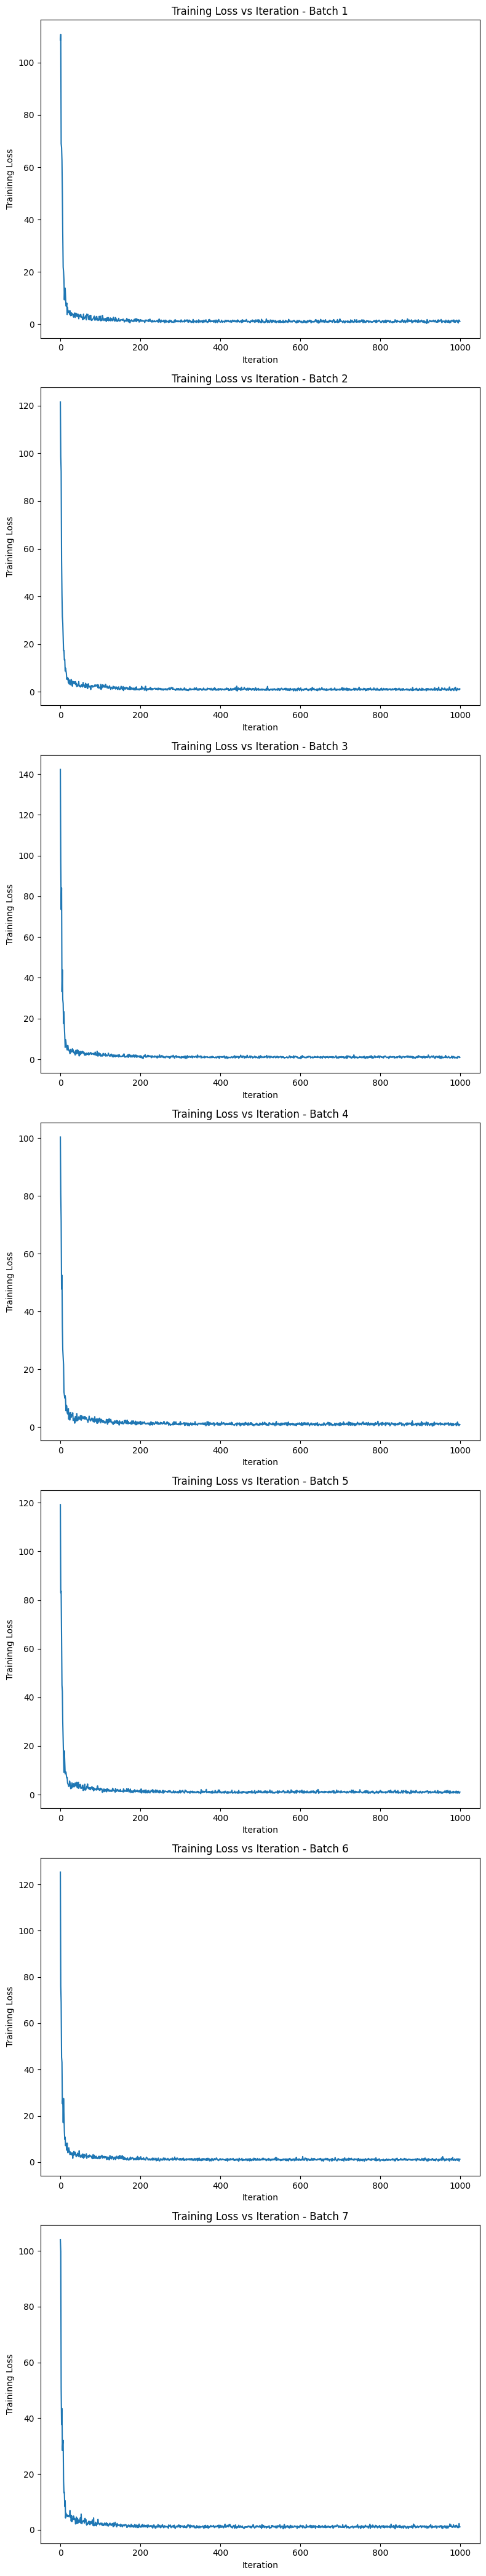

In [37]:
num_batches = cost_history.shape[0]
fig, axs = plt.subplots(num_batches, 1, figsize=(8, 6*num_batches))

for batch_number, costs in enumerate(cost_history):
    iteration_nums = np.arange(len(costs))  # Generate iteration numbers
    axs[batch_number].plot(iteration_nums, costs)
    axs[batch_number].set_xlabel('Iteration')
    axs[batch_number].set_ylabel('Traininng Loss')
    axs[batch_number].set_title(f'Training Loss vs Iteration - Batch {batch_number+1}')

plt.tight_layout()
plt.show()

### Using library function from tensorflow

In [38]:
import tensorflow as tf

batch_size = 20
class BatchLossCallback(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        m = len(Y_train)
        self.losses = [[] for _ in range(int(m/batch_size))]

    def on_batch_end(self, batch, logs={}):
        self.losses[batch].append(logs.get('loss'))



model = tf.keras.Sequential([ tf.keras.layers.Dense(1, input_shape=(1,)) ])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mean_squared_error')
batch_loss_callback = BatchLossCallback()

history = model.fit(X_train, Y_train, epochs=1000, batch_size=20, verbose=0, callbacks=[batch_loss_callback])
Y_train_pred2 = model.predict(X_train)

5/5 [==============================] - 0s 0s/step


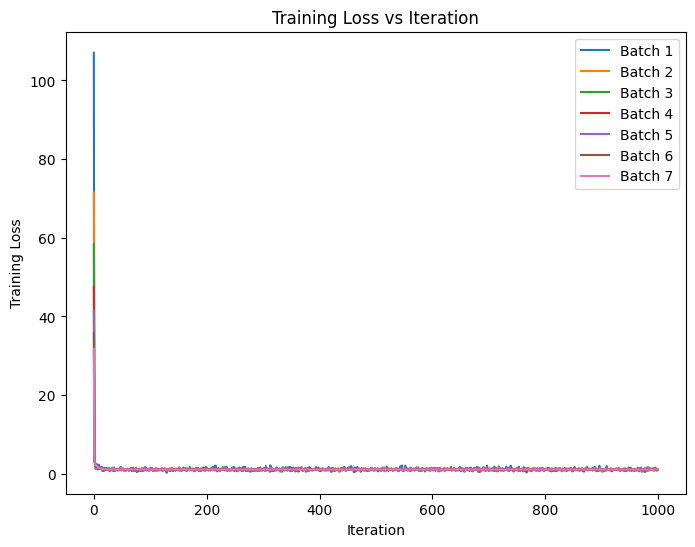

In [39]:
plt.figure(figsize=(8, 6))
for batch_number, costs in enumerate(batch_loss_callback.losses):
    iteration_nums = np.arange(len(costs))  # Generate iteration numbers
    plt.plot(iteration_nums, costs, label=f'Batch {batch_number+1}')

plt.xlabel('Iteration')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Iteration')
plt.legend()
plt.show()

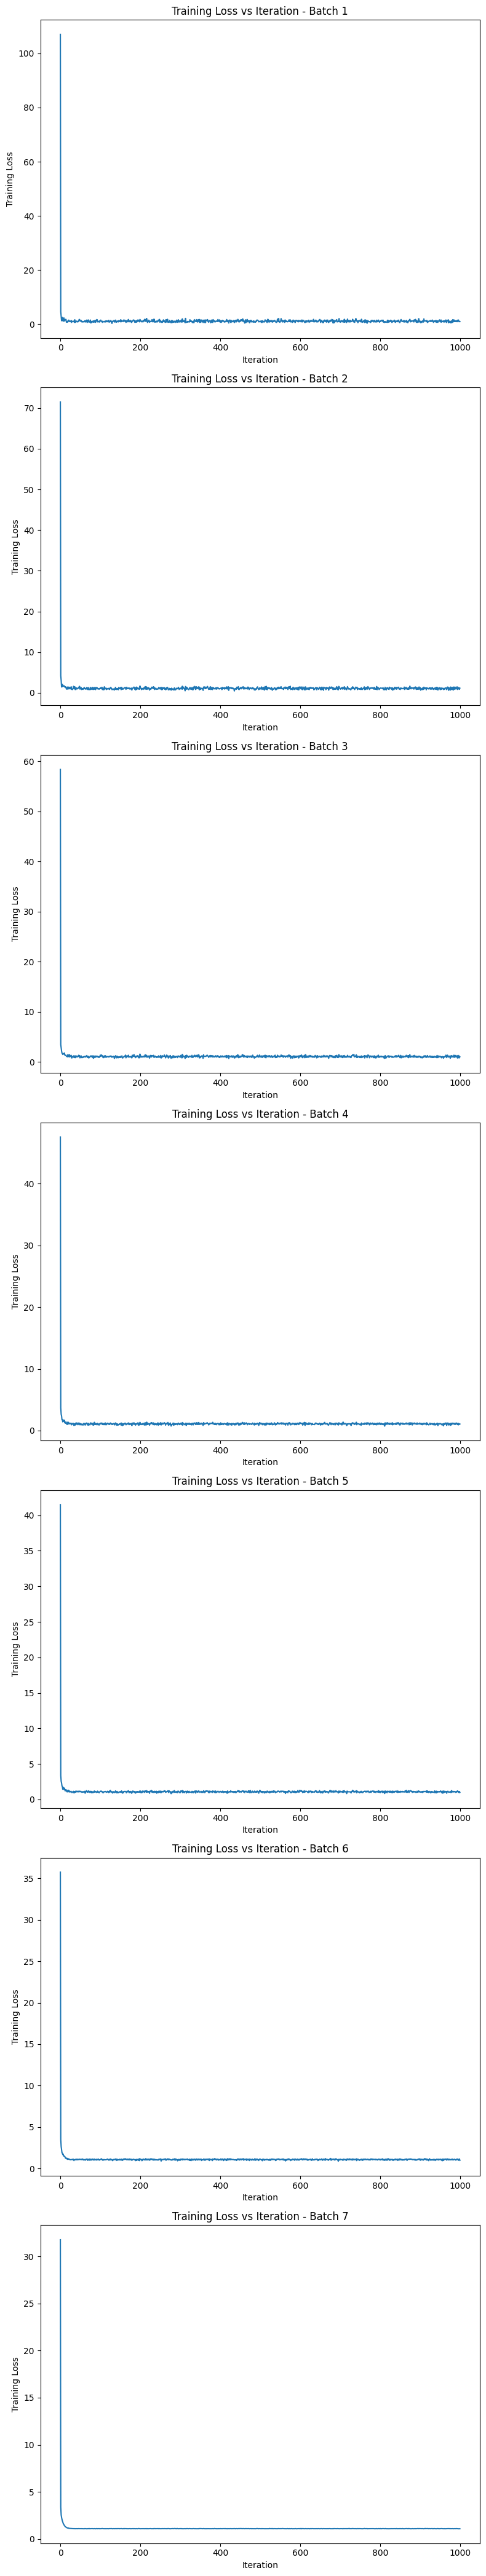

In [40]:
cost_history = np.array(batch_loss_callback.losses)
num_batches = cost_history.shape[0]
fig, axs = plt.subplots(num_batches, 1, figsize=(8, 6*num_batches))

for batch_number, costs in enumerate(cost_history):
    iteration_nums = np.arange(len(costs))  # Generate iteration numbers
    axs[batch_number].plot(iteration_nums, costs)
    axs[batch_number].set_xlabel('Iteration')
    axs[batch_number].set_ylabel('Training Loss')
    axs[batch_number].set_title(f'Training Loss vs Iteration - Batch {batch_number+1}')

plt.tight_layout()
plt.show()

### Calculating R-Squared and RMSE for test data

#### Part 1

In [41]:
from sklearn.metrics import r2_score, mean_squared_error
temp = np.c_[np.ones(len(X_test)),X_test]
Y_test_pred1 = np.dot(temp, theta)
R_Squared1 = r2_score(Y_test, Y_test_pred1)
MSE = mean_squared_error(Y_test, Y_test_pred1)
print("R-squared:", R_Squared1)
print("MSE:", MSE)

R-squared: 0.9220944122545929
MSE: 1.1097292929773237


#### Part 2

In [42]:
Y_test_pred2 = model.predict(X_test)
R_Squared2 = r2_score(Y_test, Y_test_pred2)
MSE = mean_squared_error(Y_test, Y_test_pred2)
print("R-squared:", R_Squared2)
print("MSE:", MSE)

1/1 [==============================] - 0s 14ms/step
R-squared: 0.9232383632203282
MSE: 1.0934342372163075


The tensorflow one scored a little better score, that maybe due to better optimization algorithm or it may occur due to difference in randomness while shuffling the data